In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\tiwar\OneDrive\Desktop\Projects\Sales_Performance_Analysis\Sample - Superstore.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Data is already clean lets define data set
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858022,3.789574,0.156203,28.656973
std,2885.163629,32063.693350,623.245131,2.225110,0.206452,234.260203
min,1.000000,1040.000000,0.440000,1.000000,0.000000,-6599.980000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.730000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.665000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.360000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.980000


# Univariate Analysis 🔹
- What are the top 5 most frequently ordered product sub-categories?
- How many unique customers and products are in the dataset?
- What is the distribution of Sales values?
- What is the distribution of Profit? Are there negative profits?
- Which regions have the highest number of orders?
- What are the most common shipping modes used?
- What is the most common order priority?
- What is the average discount given overall?
- How many orders fall under each customer segment?

In [6]:
# What are the top 5 most frequently ordered product sub-categories?
df.groupby('Sub-Category').agg(
    {'Sub-Category':'count'}).rename(
    columns={'Sub-Category':'Count'}).sort_values(
    by='Count', ascending=False).reset_index().head()

,Sub-Category,Count
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846


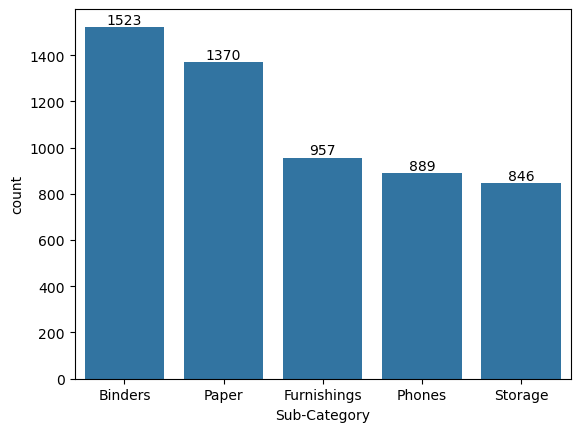

In [7]:
frequent=df.value_counts('Sub-Category').reset_index().head()
ax=sns.barplot(data=frequent,y='count',x='Sub-Category')
ax.bar_label(ax.containers[0])
plt.show()

In [8]:
# How many unique customers and products are in the dataset?
print('Unique Customers: ',df['Customer ID'].nunique())
print('Unique Products: ',df['Product Name'].nunique())

Unique Customers:  793
Unique Products:  1850


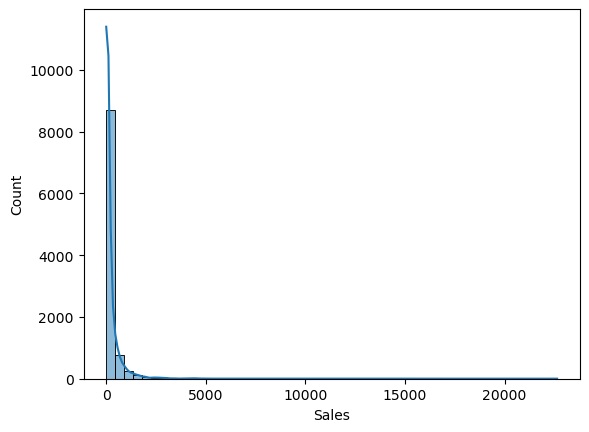

In [9]:
#What is the distribution of Sales values?
ax=sns.histplot(data=df,x='Sales',bins=50,kde=True)
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

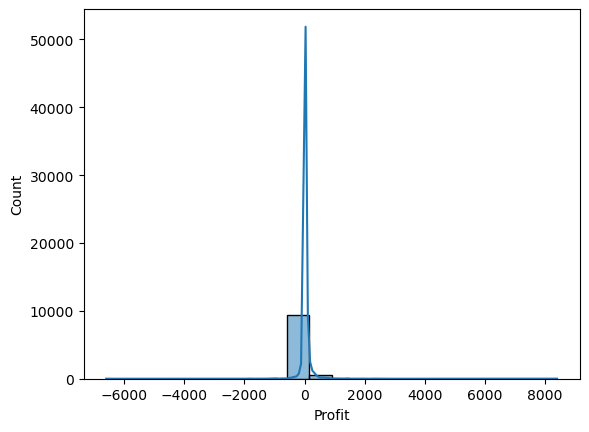

In [10]:
# Distribution of Profits
sns.histplot(data=df,x='Profit',bins=20,kde=True)

In [11]:
# Which Region have a highest number of order
df.value_counts('Region').reset_index()

,Region,count
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


In [12]:
# Most Comman shippinng Modes
df.value_counts('Ship Mode').reset_index()

,Ship Mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [13]:
# Most Comman Order Priority
df['Product Name'].value_counts().reset_index().head(1)

,Product Name,count
0,Staple envelope,48


In [14]:
# Avg Discount Given overall
df['Discount amt']=df.Sales*df.Discount

In [15]:
df['Discount amt'].sum()/df['Discount amt'].count()

32.277590204122475

In [16]:
# How many orders fall under each customer segment
df.value_counts('Segment').reset_index()

,Segment,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


# Bivariate Analysis 🔹
- What is the relationship between sales and profit?
- Does discount affect profit? (Scatter plot or correlation)
- Which sub-categories have high sales but low profit?
- Which states generate the most profit and which incur losses?
- Compare profit across regions – who performs best?
- Which product categories are most popular among customers?
- What is the average sales and profit per order for each sub-category?
- Does ship mode impact delivery performance or profit margins?

<Axes: xlabel='Profit', ylabel='Sales'>

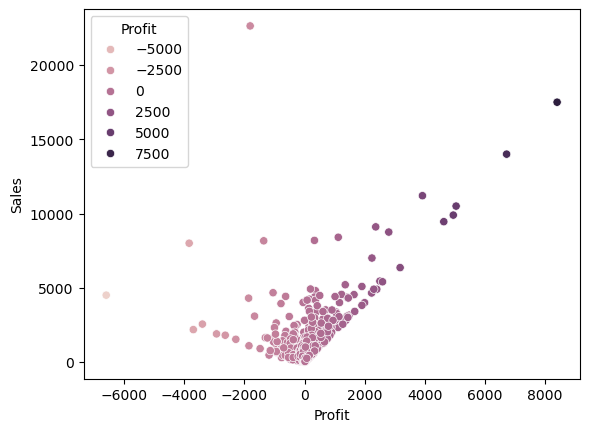

In [17]:
# Relationship between sales and profit
sns.scatterplot(data=df,x='Profit',y='Sales',hue='Profit')

<Axes: xlabel='Profit', ylabel='Discount amt'>

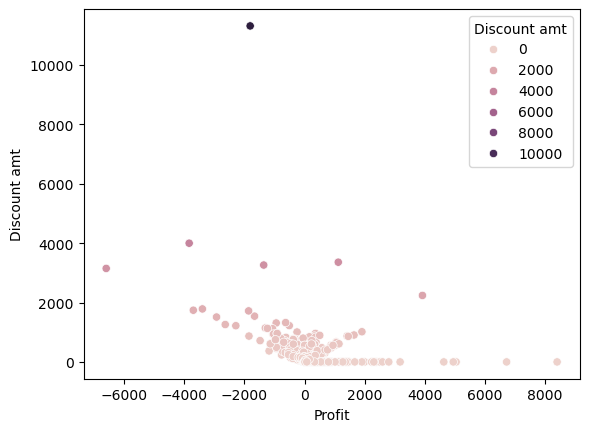

In [18]:
# Does discount affect profit
sns.scatterplot(data=df,y='Discount amt',x='Profit',hue='Discount amt')

In [19]:
# Which sub catogery have high sale and low profit
df.groupby('Sub-Category').agg({'Sales':'sum','Profit':'sum'}).sort_values(by=['Sales','Profit'],ascending=[False,True])

,Sales,Profit
Sub-Category,,
Phones,330007.10,44516.25
Chairs,328449.13,26590.15
Storage,223843.59,21279.05
Tables,206965.68,-17725.59
Binders,203412.77,30221.64
Machines,189238.68,3384.73
Accessories,167380.31,41936.78
Copiers,149528.01,55617.90
Bookcases,114880.05,-3472.56


In [20]:
# Which states generate the most profit and which incur losses?
df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).sort_values(by=['Sales','Profit'],ascending=[False,False])

,Sales,Profit
State,,
California,457687.68,76381.60
New York,310876.20,74038.64
Texas,170187.98,-25729.29
Washington,138641.29,33402.70
Pennsylvania,116512.02,-15560.04
Florida,89473.73,-3399.25
Illinois,80166.16,-12607.89
Ohio,78258.21,-16971.37
Michigan,76269.61,24463.15


In [21]:
# Compare profit across regions – who performs best?
df.groupby('Region').agg({'Profit':'sum'})

,Profit
Region,
Central,39706.45
East,91522.84
South,46749.71
West,108418.79


In [22]:
# Which product categories are most popular among customers?
df.value_counts('Category').reset_index()

,Category,count
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


In [23]:
# What is the average sales and profit per order for each sub-category?
df.groupby('Sub-Category').agg({'Sales':'mean','Profit':'mean'})

,Sales,Profit
Sub-Category,,
Accessories,215.974594,54.111974
Appliances,230.755665,38.922897
Art,34.068844,8.200955
Binders,133.560584,19.843493
Bookcases,503.859868,-15.230526
Chairs,532.332464,43.095867
Copiers,2198.941324,817.910294
Envelopes,64.867638,27.417717
Fasteners,13.936636,4.375714


In [24]:
# Does ship mode impact delivery performance or profit margins?
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')

In [25]:
df['Dilevery_days']=(df['Ship Date'] - df['Order Date']).dt.days

In [26]:
delivery_performance=df.groupby('Ship Mode')['Dilevery_days'].mean().sort_values()*100

In [27]:
delivery_performance

Ship Mode
Same Day            4.419890
First Class       218.270481
Second Class      323.804627
Standard Class    500.653485
Name: Dilevery_days, dtype: float64

C:\Users\tiwar\AppData\Local\Temp\ipykernel_5676\1720866414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=delivery_performance.index, y=delivery_performance.values, palette="Blues_r")


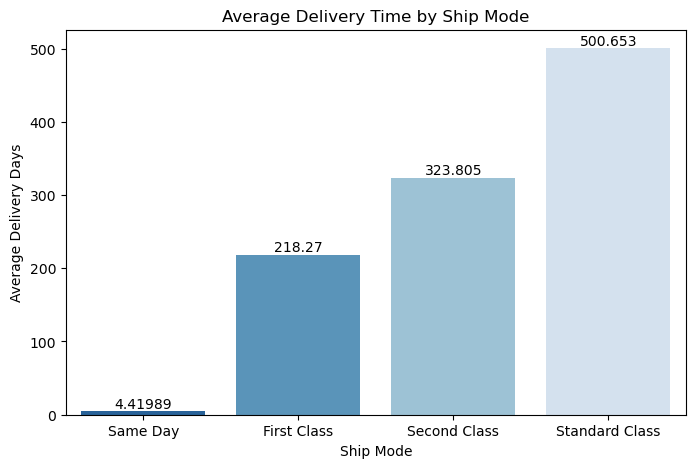

In [28]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=delivery_performance.index, y=delivery_performance.values, palette="Blues_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("Average Delivery Time by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Average Delivery Days")
plt.show()

In [29]:
df['Profit Margin']=(df['Profit']/df['Sales'])

In [30]:
# AVG Profit margin by Ship Mode
profit_by_ship=round(df.groupby('Ship Mode')['Profit Margin'].mean()*100,2)

In [31]:
profit_by_ship

Ship Mode
First Class       11.59
Same Day          13.82
Second Class      15.02
Standard Class    11.01
Name: Profit Margin, dtype: float64

C:\Users\tiwar\AppData\Local\Temp\ipykernel_5676\1357809331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=profit_by_ship.index,y=profit_by_ship.values,palette="Blues_r")


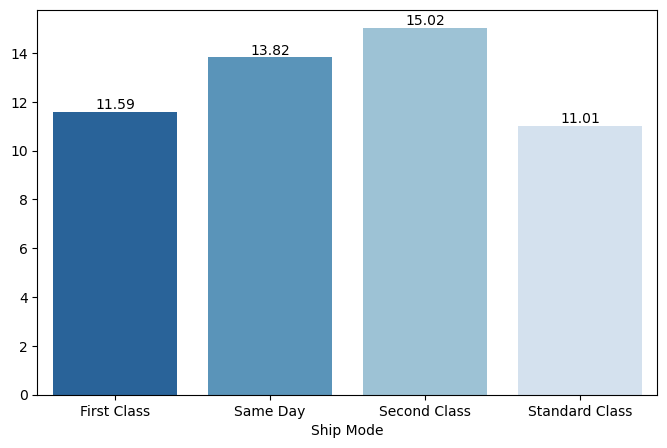

In [32]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=profit_by_ship.index,y=profit_by_ship.values,palette="Blues_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.show()

# Time-Based Analysis 🔹
- How does the sales trend look over time (monthly/yearly)?
- Are there seasonal patterns in order volume?
- How does the number of orders change over the years?

In [33]:
# How does the sales trend look over time (monthly/yearly)?
df['Order Month']=df['Order Date'].dt.month

In [34]:
df['Order Year']=df['Order Date'].dt.year

C:\Users\tiwar\AppData\Local\Temp\ipykernel_5676\3686488477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,x='Order Month',y='Sales',palette="Blues_r")


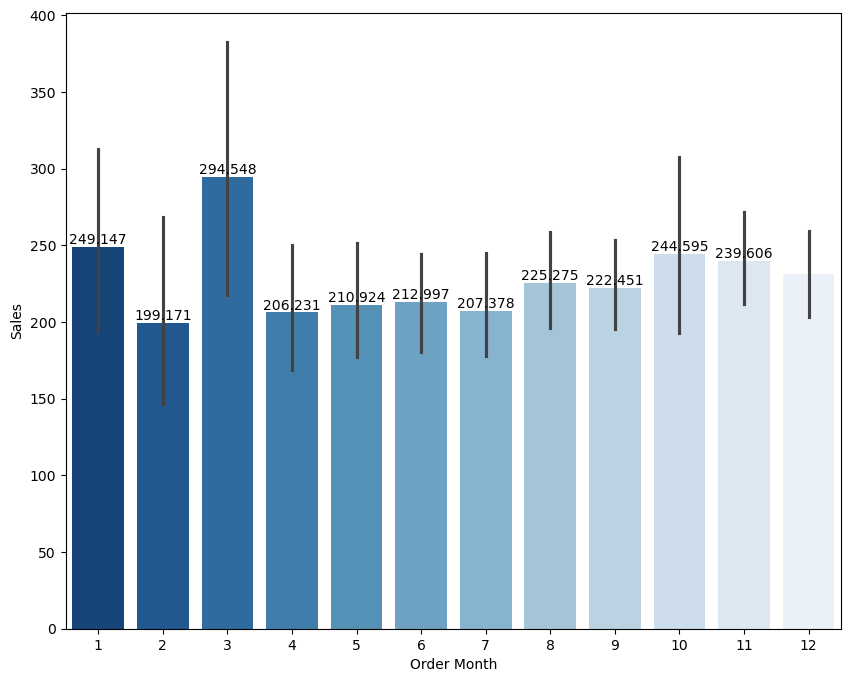

In [35]:
# Trend over Month
plt.figure(figsize=(10,8))
ax=sns.barplot(data=df,x='Order Month',y='Sales',palette="Blues_r")
for i in range(0,len(ax.containers)-1):
    ax.bar_label(ax.containers[i])
plt.show()

C:\Users\tiwar\AppData\Local\Temp\ipykernel_5676\1216768138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,x='Order Year',y='Sales',palette="Blues_r")


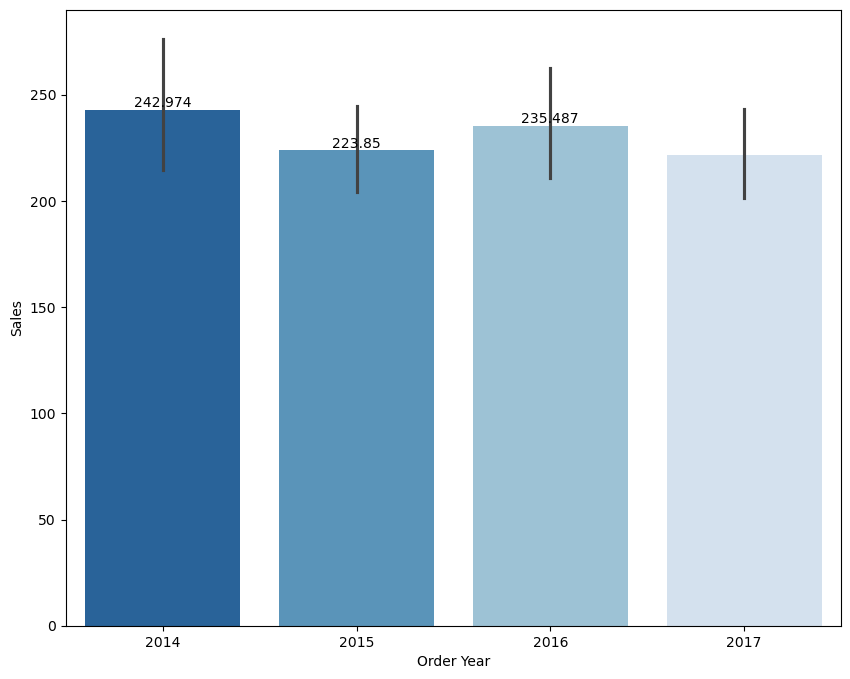

In [36]:
# Trend over Month
plt.figure(figsize=(10,8))
ax=sns.barplot(data=df,x='Order Year',y='Sales',palette="Blues_r")
for i in range(0,len(ax.containers)-1):
    ax.bar_label(ax.containers[i])
plt.show()

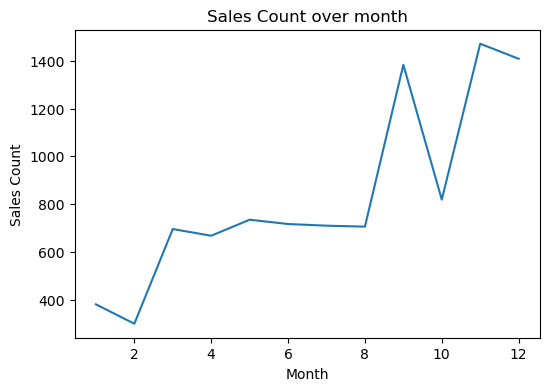

In [37]:
# Are there seasonal patterns in order volume?
season=df.groupby('Order Month')['Order Month'].value_counts().reset_index()
plt.figure(figsize=[6,4])
ax=sns.lineplot(data=season,x='Order Month',y='count')
ax.set(xlabel="Month", ylabel="Sales Count", title="Sales Count over month")
plt.show()

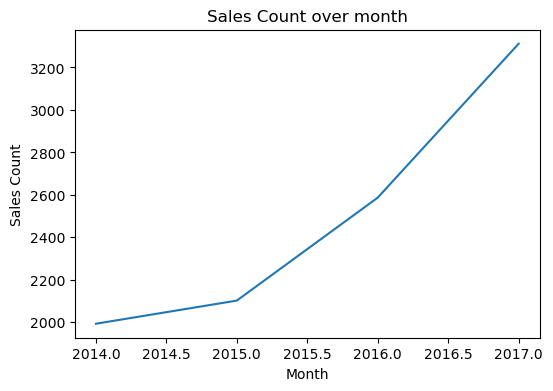

In [38]:
# How does the number of orders change over the years?
season=df.groupby('Order Year')['Order Year'].value_counts().reset_index()
plt.figure(figsize=[6,4])
ax=sns.lineplot(data=season,x='Order Year',y='count')
ax.set(xlabel="Month", ylabel="Sales Count", title="Sales Count over month")
plt.show()

# Customer & Market Insights 🔹
- Who are the top 10 customers by sales and profit?
- What is the repeat order pattern by customers?
- Which customer segments contribute the most to sales?
- What is the average order value per customer?

In [39]:
# Top 10 customers by sales and profit
df.groupby('Customer Name').agg({'Sales':'sum','Profit':'sum'}).reset_index().sort_values(by=['Sales','Profit'],ascending=[False,False]).head(10)

,Customer Name,Sales,Profit
686,Sean Miller,25043.07,-1980.75
730,Tamara Chand,19052.22,8981.32
622,Raymond Buch,15117.35,6976.09
757,Tom Ashbrook,14595.62,4703.80
6,Adrian Barton,14473.57,5444.81
441,Ken Lonsdale,14175.23,806.84
671,Sanjit Chand,14142.34,5757.42
334,Hunter Lopez,12873.30,5622.43
672,Sanjit Engle,12209.44,2650.67
156,Christopher Conant,12129.08,2177.05


In [40]:
# Repeated Order Pattern by customers
df.groupby('Sub-Category')['Sub-Category'].value_counts().reset_index().sort_values(by='count',ascending=False).head(1)

,Sub-Category,count
3,Binders,1523


In [41]:
# Which customer segment contribute the most to sales
df.groupby('Segment').agg({'Sales':'sum'}).reset_index().sort_values(by='Sales',ascending=False).head(1)

,Segment,Sales
0,Consumer,1161401.34


In [42]:
# Avg order value per order
df.groupby('Order ID').agg({'Sales':'mean'}).reset_index().sort_values(by='Sales',ascending=False)

,Order ID,Sales
4126,CA-2017-166709,10499.97
1967,CA-2016-117121,9892.74
547,CA-2014-145541,6999.96
3596,CA-2017-140151,4684.16
540,CA-2014-144624,4548.81
...,...,...
4719,US-2017-100209,1.08
4315,US-2014-152723,0.88
162,CA-2014-112403,0.85
2768,CA-2016-168361,0.84


# Advanced / Insight-Driven 🔹
- Are there any products or categories that consistently lose money?
- What is the profit margin per sub-category?
- Which states or cities have the best conversion between sales and profit?
- How does discount impact different sub-categories?
- Are there outliers in sales or profit that could skew analysis?
- Which combinations of region + category + segment are most profitable?

In [43]:
# Are there any product or caegories that consistently lose money
loss=df.groupby('Product Name').agg({'Profit':'mean'}).reset_index().sort_values(by='Profit')

In [44]:
loss[loss['Profit']<0]

,Product Name,Profit
476,Cubify CubeX 3D Printer Triple Head Print,-3839.990000
475,Cubify CubeX 3D Printer Double Head Print,-2959.990000
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.080000
985,Lexmark MX611dhe Monochrome Laser Printer,-1147.492500
1838,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.280000
...,...,...
574,Eldon Gobal File Keepers,-0.100000
1359,Rubber Band Ball,-0.077500
67,"Acco PRESSTEX Data Binder with Storage Hooks, ...",-0.040000
269,"Avery Trapezoid Extra Heavy Duty 4"" Binders",-0.002500


In [49]:
# What is profit margin per sub category
profit_margin=df.groupby('Sub-Category').agg({'Sales':'sum','Profit':'sum'}).reset_index()

In [53]:
profit_margin['profit_margin']=round((profit_margin.Sales/profit_margin.Profit)*100,2)

In [54]:
profit_margin

,Sub-Category,Sales,Profit,profit_margin
0,Accessories,167380.31,41936.78,399.13
1,Appliances,107532.14,18138.07,592.85
2,Art,27118.80,6527.96,415.43
3,Binders,203412.77,30221.64,673.07
4,Bookcases,114880.05,-3472.56,-3308.22
5,Chairs,328449.13,26590.15,1235.23
6,Copiers,149528.01,55617.90,268.85
7,Envelopes,16476.38,6964.10,236.59
8,Fasteners,3024.25,949.53,318.50
9,Furnishings,91705.12,13059.25,702.22


In [58]:
# Which State or cities have best conversion between Sales and profit
df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).reset_index().sort_values(by='Profit',ascending=False).head(1)

,State,Sales,Profit
3,California,457687.68,76381.6


In [59]:
df.groupby('City').agg({'Sales':'sum','Profit':'sum'}).reset_index().sort_values(by='Profit',ascending=False).head(1)

,City,Sales,Profit
329,New York City,256368.12,62037.08


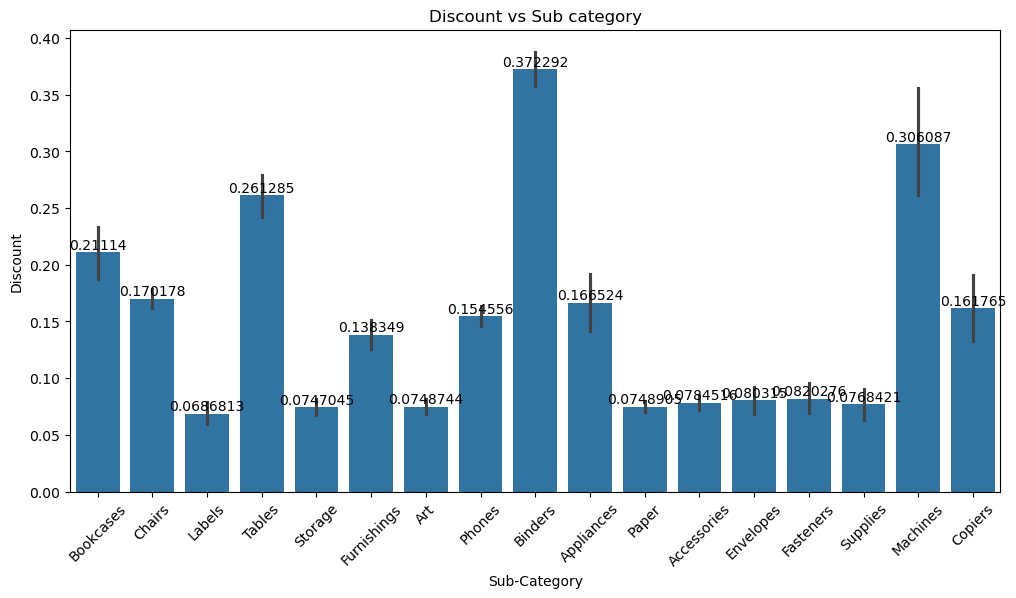

In [70]:
# How does discount impact different sub category
plt.figure(figsize=(12,6))
plt.title('Discount vs Sub category')
ax=sns.barplot(data=df,x='Sub-Category',y='Discount')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

In [79]:
# Outlire in Sales and profit
# We will use boxplot to find Outlire
Q1=df.Profit.quantile(0.25)
Q3=df.Profit.quantile(0.75)

In [81]:
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [83]:
# Outlire data of Profit
df[(df.Profit<lower_bound) | (df.Profit>upper_bound)]
# Using Same way we can found outlires in sales column as well

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount amt,Dilevery_days,Profit Margin,Order Month,Order Year
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,0.0000,3,0.299997,11,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,430.9110,7,-0.399998,10,2015
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15,6,0.20,90.72,181.4300,5,0.100006,6,2014
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.18,9,0.20,85.31,341.2360,5,0.050001,6,2014
13,14,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3,0.20,132.59,81.5960,5,0.324991,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,New York,10801,East,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.92,4,0.00,109.72,0.0000,6,0.489996,11,2014
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.47,4,0.32,-67.67,122.7104,3,-0.176468,3,2015
9968,9969,CA-2017-153871,2017-12-11,2017-12-17,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Plainfield,New Jersey,7060,East,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.98,2,0.00,331.19,0.0000,6,0.449999,12,2017
9979,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.47,14,0.20,153.12,87.4940,4,0.350013,12,2016


In [85]:
# which combination of region + category + segment is most profitable
region_combo_profit = (
    df.groupby(['Region', 'Category', 'Segment'])['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
)

# Display top 10 combinations
print("Top 10 Region + Category + Segment Combinations by Profit:")
print(region_combo_profit.head(10))

Top 10 Region + Category + Segment Combinations by Profit:
     Region         Category      Segment    Profit
33     West       Technology     Consumer  27785.71
30     West  Office Supplies     Consumer  25334.39
15     East       Technology     Consumer  19930.22
12     East  Office Supplies     Consumer  19222.63
31     West  Office Supplies    Corporate  18527.67
17     East       Technology  Home Office  17709.11
7   Central       Technology    Corporate  16282.66
13     East  Office Supplies    Corporate  13457.66
24    South       Technology     Consumer  13106.77
34     West       Technology    Corporate  11941.17


C:\Users\tiwar\AppData\Local\Temp\ipykernel_5676\1725397570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


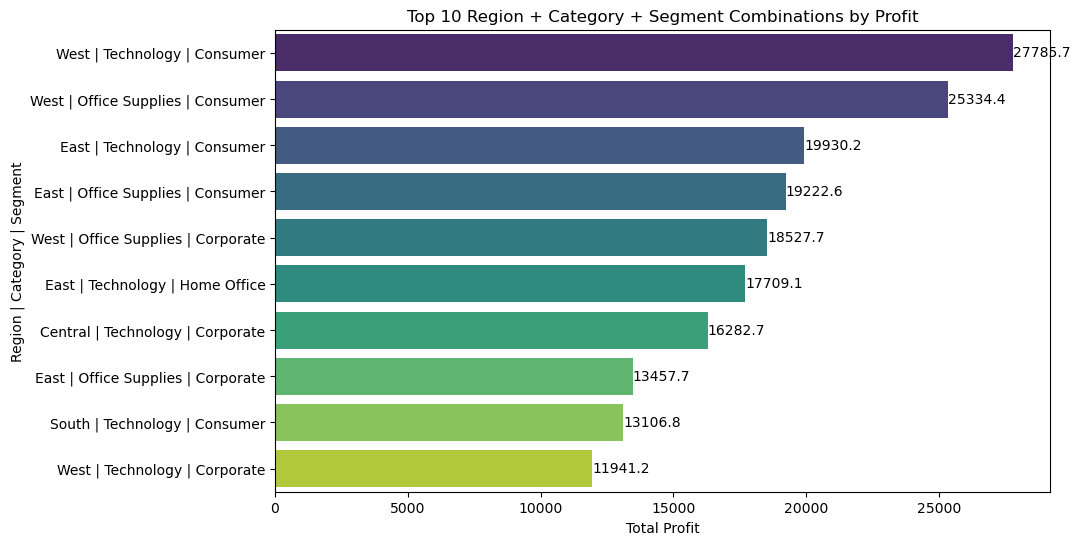

In [91]:
top_10_combos = region_combo_profit.head(10)

plt.figure(figsize=(10,6))
ax=sns.barplot(
    x='Profit', 
    y=top_10_combos['Region'] + " | " + top_10_combos['Category'] + " | " + top_10_combos['Segment'],
    data=top_10_combos,
    palette="viridis"
)
for i in range(0,len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title("Top 10 Region + Category + Segment Combinations by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Region | Category | Segment")
plt.show()